In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire_Home_Apt.csv')

In [17]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

float64


In [18]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_12472\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [19]:
df = df.select_dtypes(include=['float', 'int64']) 


In [20]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,host_total_listings_count,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
Unnamed: 0,1.000000,0.137664,-0.014700,0.066643,0.213561,0.945858,0.423006,0.087138,0.061407,-0.008780,...,0.092865,0.047070,0.035565,0.060155,0.072016,0.042293,0.037194,NaN,0.140910,NaN
host_acceptance_rate,0.137664,1.000000,0.364659,0.232761,0.287231,0.136854,0.050516,0.181284,0.173908,0.032829,...,0.078985,0.061598,0.080663,0.058297,0.226429,0.206964,0.062721,NaN,0.226536,NaN
host_is_superhost,-0.014700,0.364659,1.000000,0.095419,0.061598,0.001483,-0.070948,0.065208,0.078500,0.033876,...,0.137384,0.106078,0.144010,0.045173,0.070614,0.097919,-0.011114,NaN,0.226653,NaN
host_identity_verified,0.066643,0.232761,0.095419,1.000000,0.069063,0.067601,-0.000993,0.050249,0.050418,0.019897,...,0.046474,0.052379,0.059414,0.054240,0.031911,0.022456,0.042899,NaN,0.025710,NaN
instant_bookable,0.213561,0.287231,0.061598,0.069063,1.000000,0.199933,0.153013,0.229432,0.217924,-0.009469,...,-0.037176,-0.056021,-0.080282,0.009683,0.241828,0.210247,0.053491,NaN,0.145045,NaN
id,0.945858,0.136854,0.001483,0.067601,0.199933,1.000000,0.384885,0.078661,0.055702,-0.003262,...,0.095479,0.056245,0.044378,0.066219,0.067831,0.035929,0.037010,NaN,0.134152,NaN
host_id,0.423006,0.050516,-0.070948,-0.000993,0.153013,0.384885,1.000000,0.040221,-0.007570,-0.012346,...,0.005423,-0.017670,-0.025059,-0.027924,0.069178,0.024870,0.002452,NaN,0.055720,NaN
host_listings_count,0.087138,0.181284,0.065208,0.050249,0.229432,0.078661,0.040221,1.000000,0.855019,-0.060812,...,-0.036773,-0.052024,-0.063450,0.002041,0.736048,0.529546,0.188096,NaN,0.054826,NaN
host_total_listings_count,0.061407,0.173908,0.078500,0.050418,0.217924,0.055702,-0.007570,0.855019,1.000000,-0.040536,...,-0.046622,-0.061000,-0.068655,-0.002074,0.702473,0.483232,0.198638,NaN,0.060549,NaN
accommodates,-0.008780,0.032829,0.033876,0.019897,-0.009469,-0.003262,-0.012346,-0.060812,-0.040536,1.000000,...,0.006209,-0.003527,0.009225,0.008952,-0.051825,-0.040651,-0.056422,NaN,0.051781,NaN


In [21]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,host_total_listings_count,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
Unnamed: 0,1.000000,0.137664,0.014700,0.066643,0.213561,0.945858,0.423006,0.087138,0.061407,0.008780,...,0.092865,0.047070,0.035565,0.060155,0.072016,0.042293,0.037194,NaN,0.140910,NaN
host_acceptance_rate,0.137664,1.000000,0.364659,0.232761,0.287231,0.136854,0.050516,0.181284,0.173908,0.032829,...,0.078985,0.061598,0.080663,0.058297,0.226429,0.206964,0.062721,NaN,0.226536,NaN
host_is_superhost,0.014700,0.364659,1.000000,0.095419,0.061598,0.001483,0.070948,0.065208,0.078500,0.033876,...,0.137384,0.106078,0.144010,0.045173,0.070614,0.097919,0.011114,NaN,0.226653,NaN
host_identity_verified,0.066643,0.232761,0.095419,1.000000,0.069063,0.067601,0.000993,0.050249,0.050418,0.019897,...,0.046474,0.052379,0.059414,0.054240,0.031911,0.022456,0.042899,NaN,0.025710,NaN
instant_bookable,0.213561,0.287231,0.061598,0.069063,1.000000,0.199933,0.153013,0.229432,0.217924,0.009469,...,0.037176,0.056021,0.080282,0.009683,0.241828,0.210247,0.053491,NaN,0.145045,NaN
id,0.945858,0.136854,0.001483,0.067601,0.199933,1.000000,0.384885,0.078661,0.055702,0.003262,...,0.095479,0.056245,0.044378,0.066219,0.067831,0.035929,0.037010,NaN,0.134152,NaN
host_id,0.423006,0.050516,0.070948,0.000993,0.153013,0.384885,1.000000,0.040221,0.007570,0.012346,...,0.005423,0.017670,0.025059,0.027924,0.069178,0.024870,0.002452,NaN,0.055720,NaN
host_listings_count,0.087138,0.181284,0.065208,0.050249,0.229432,0.078661,0.040221,1.000000,0.855019,0.060812,...,0.036773,0.052024,0.063450,0.002041,0.736048,0.529546,0.188096,NaN,0.054826,NaN
host_total_listings_count,0.061407,0.173908,0.078500,0.050418,0.217924,0.055702,0.007570,0.855019,1.000000,0.040536,...,0.046622,0.061000,0.068655,0.002074,0.702473,0.483232,0.198638,NaN,0.060549,NaN
accommodates,0.008780,0.032829,0.033876,0.019897,0.009469,0.003262,0.012346,0.060812,0.040536,1.000000,...,0.006209,0.003527,0.009225,0.008952,0.051825,0.040651,0.056422,NaN,0.051781,NaN


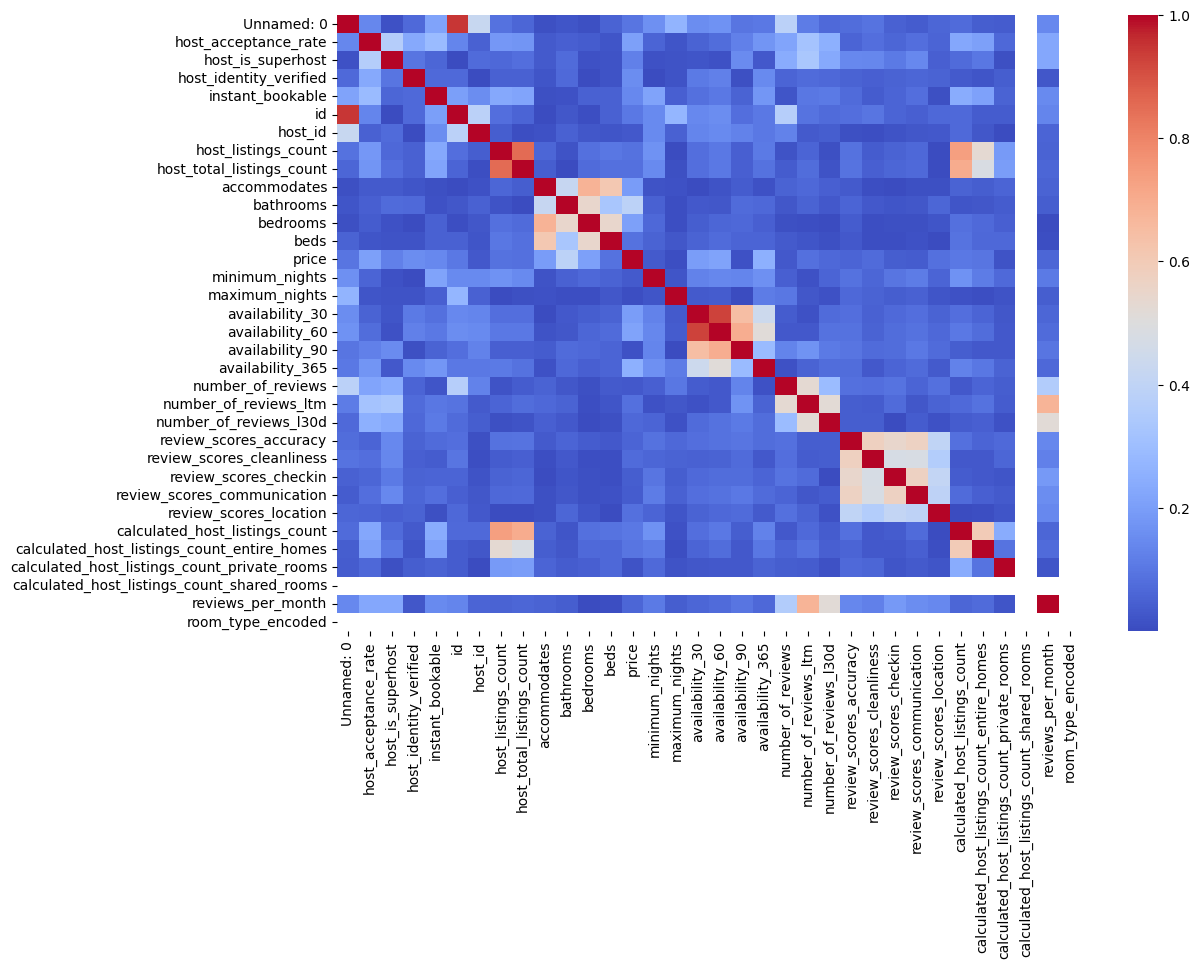

In [22]:
# Ajustamos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm', annot_kws={"size": 8})

# Mostramos el mapa de calor
plt.show()

Regresión multiple host_acceptance_rate

<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

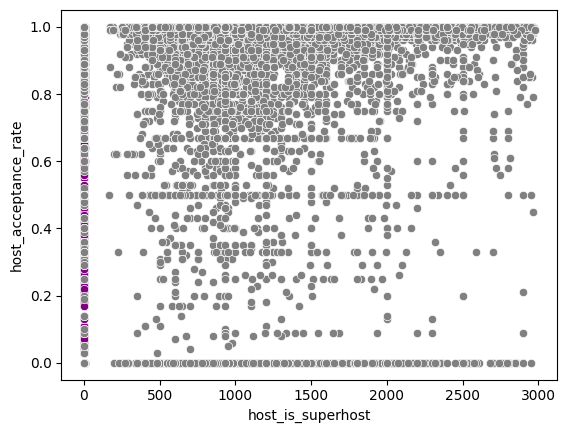

In [ ]:
from turtle import color
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='host_acceptance_rate', color="purple", data=df)
sns.scatterplot(x='price', y='host_acceptance_rate', color="grey", data=df)

In [24]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'reviews_per_month','price']]
Var_Dep= df['host_acceptance_rate']

In [25]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [26]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.97898889e-01, 4.18296212e-02, 7.82397964e-05]),
 'rank_': 3,
 'singular_': array([8.33870201e+04, 1.46654873e+02, 6.33587656e+01]),
 'intercept_': np.float64(0.5962160217630911)}

In [27]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.17879472257976914

In [28]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['host_is_superhost', 'reviews_per_month','price']])
y_pred

array([0.74197382, 0.81126506, 0.96583064, ..., 0.76288732, 0.97314809,
       0.9727569 ], shape=(17363,))

In [29]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples1', y_pred)
df

,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,0.741974,0,0.00,0,1,0,35797,153786,1.0,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,0.811265,1,0.93,1,1,0,44616,196253,12.0,13.0,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,0.965831,2,0.57,1,1,0,67703,334451,3.0,4.0,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,0.918027,3,1.00,1,1,0,70644,212109,3.0,4.0,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,0.871690,4,1.00,1,1,0,107078,540705,5.0,7.0,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,0.723767,26572,0.00,0,1,0,1251627039124173262,653494962,1.0,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,0.817655,26573,0.00,0,1,0,1251642490491185216,652781543,1.0,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,0.762887,26574,0.00,0,1,0,1251769567383709085,376814072,1.0,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,0.973148,26575,1.00,1,1,1,1251800961446133530,237937785,27.0,30.0,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

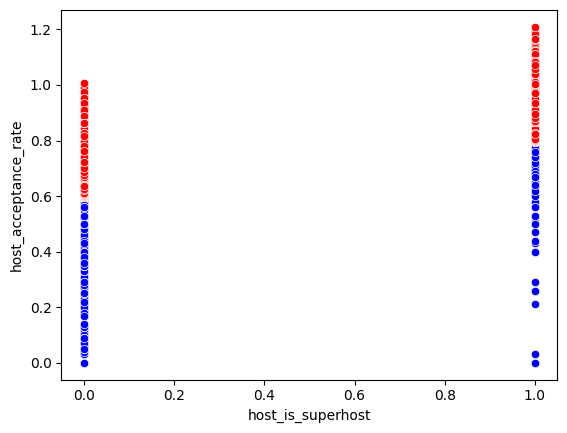

In [30]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='PrediccionesMultiples1', color="red", data=df)


In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.17879472257976914

In [32]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.42284124985598215)

Regresión multiple host_is_superhost

<Axes: xlabel='bedrooms', ylabel='host_is_superhost'>

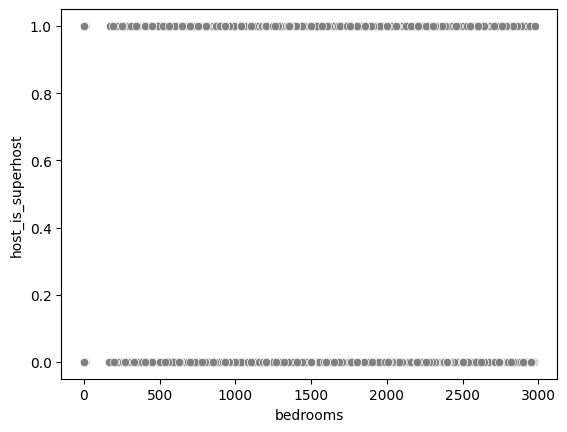

In [33]:
from turtle import color
sns.scatterplot(x='bedrooms', y='host_is_superhost', color="red", data=df)
sns.scatterplot(x='accommodates', y='host_is_superhost', color="purple", data=df)
sns.scatterplot(x='price', y='host_is_superhost', color="grey", data=df)

In [34]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bedrooms', 'accommodates','price']]
Var_Dep= df['host_is_superhost']

In [35]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [36]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'accommodates', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-2.63206164e-02,  1.19395205e-02,  9.86193886e-05]),
 'rank_': 3,
 'singular_': array([8.33870287e+04, 1.88412820e+02, 5.96959154e+01]),
 'intercept_': np.float64(0.37942707611095317)}

In [37]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.016163756543647656

In [38]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['bedrooms', 'accommodates','price']])
y_pred

array([0.4689678 , 0.37689078, 0.57464266, ..., 0.49532877, 0.52285015,
       0.51041753], shape=(17363,))

In [39]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples2', y_pred)
df

,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,host_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,0.468968,0.741974,0,0.00,0,1,0,35797,153786,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,0.376891,0.811265,1,0.93,1,1,0,44616,196253,12.0,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,0.574643,0.965831,2,0.57,1,1,0,67703,334451,3.0,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,0.489412,0.918027,3,1.00,1,1,0,70644,212109,3.0,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,0.468968,0.871690,4,1.00,1,1,0,107078,540705,5.0,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,0.417257,0.723767,26572,0.00,0,1,0,1251627039124173262,653494962,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,0.561921,0.817655,26573,0.00,0,1,0,1251642490491185216,652781543,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,0.495329,0.762887,26574,0.00,0,1,0,1251769567383709085,376814072,1.0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,0.522850,0.973148,26575,1.00,1,1,1,1251800961446133530,237937785,27.0,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


<Axes: xlabel='bedrooms', ylabel='host_is_superhost'>

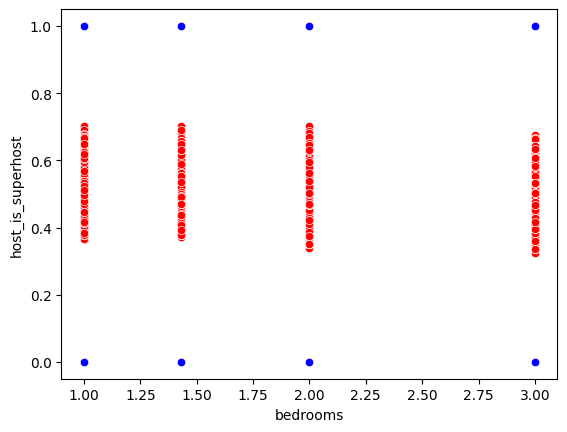

In [40]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='bedrooms', y='host_is_superhost', color="blue", data=df)
sns.scatterplot(x='bedrooms', y='PrediccionesMultiples2', color="red", data=df)


Regresión multiple host_total_listings_count

<Axes: xlabel='host_is_superhost', ylabel='host_total_listings_count'>

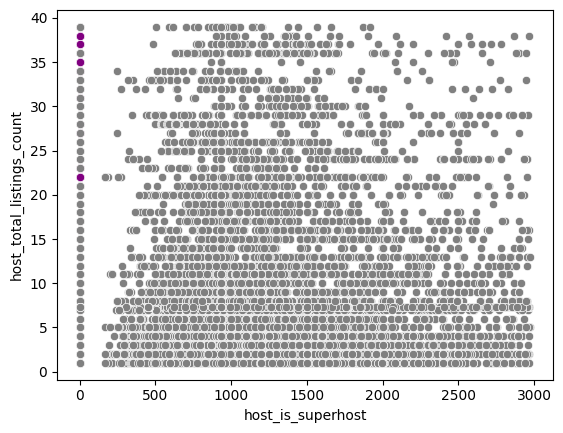

In [41]:
from turtle import color
sns.scatterplot(x='host_is_superhost', y='host_total_listings_count', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='host_total_listings_count', color="purple", data=df)
sns.scatterplot(x='price', y='host_total_listings_count', color="grey", data=df)

In [42]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_is_superhost', 'reviews_per_month','price']]
Var_Dep= df['host_total_listings_count']

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.93765313, 0.30174001, 0.00093858]),
 'rank_': 3,
 'singular_': array([8.33870201e+04, 1.46654873e+02, 6.33587656e+01]),
 'intercept_': np.float64(5.459566662050996)}

In [45]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.013681263172636404

In [46]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['host_is_superhost', 'reviews_per_month','price']])
y_pred

array([6.86000915, 6.5209332 , 8.39514086, ..., 7.11089196, 8.19684095,
       8.19214805], shape=(17363,))

In [47]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples3New', y_pred)
df

,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,6.860009,0.468968,0.741974,0,0.00,0,1,0,35797,153786,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,6.520933,0.376891,0.811265,1,0.93,1,1,0,44616,196253,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,8.395141,0.574643,0.965831,2,0.57,1,1,0,67703,334451,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,7.717647,0.489412,0.918027,3,1.00,1,1,0,70644,212109,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,7.305826,0.468968,0.871690,4,1.00,1,1,0,107078,540705,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,6.641601,0.417257,0.723767,26572,0.00,0,1,0,1251627039124173262,653494962,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,7.767899,0.561921,0.817655,26573,0.00,0,1,0,1251642490491185216,652781543,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,7.110892,0.495329,0.762887,26574,0.00,0,1,0,1251769567383709085,376814072,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,8.196841,0.522850,0.973148,26575,1.00,1,1,1,1251800961446133530,237937785,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


<Axes: xlabel='host_is_superhost', ylabel='host_total_listings_count'>

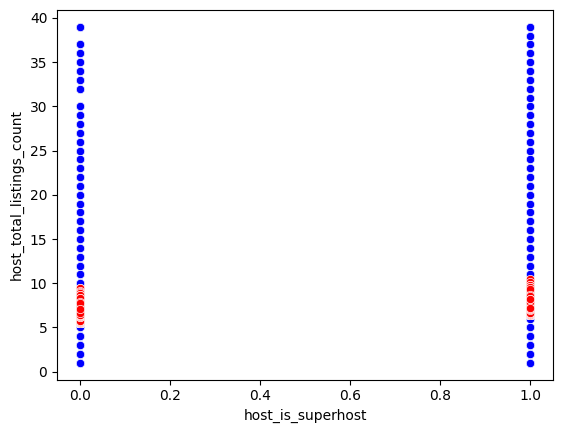

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='PrediccionesMultiples3New', color="red", data=df)


Regresión multiple room_type

<Axes: xlabel='bedrooms', ylabel='accommodates'>

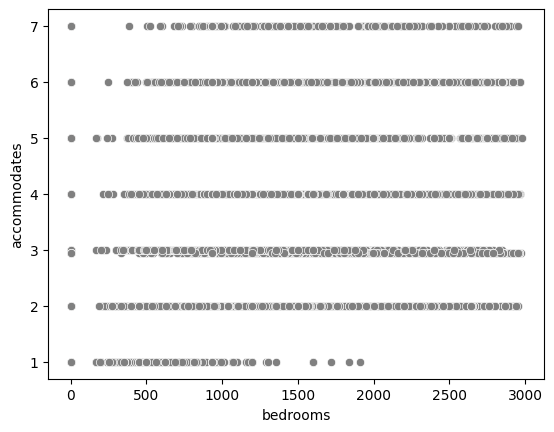

In [49]:
from turtle import color
sns.scatterplot(x='bedrooms', y='accommodates', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='accommodates', color="purple", data=df)
sns.scatterplot(x='price', y='accommodates', color="grey", data=df)

In [50]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['bedrooms', 'reviews_per_month','price']]
Var_Dep= df['accommodates']

In [51]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [52]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'reviews_per_month', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([1.41168594e+00, 5.87145313e-02, 1.20776946e-04]),
 'rank_': 3,
 'singular_': array([83387.02159549,   145.77787219,    84.46766765]),
 'intercept_': np.float64(0.9552041771937283)}

In [53]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.46799633741765456

In [54]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['bedrooms', 'reviews_per_month','price']])
y_pred

array([2.58170206, 2.99798803, 4.04183398, ..., 2.61398573, 2.63306849,
       2.63246461], shape=(17363,))

In [55]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples4', y_pred)
df

,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,2.581702,6.860009,0.468968,0.741974,0,0.00,0,1,0,35797,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,2.997988,6.520933,0.376891,0.811265,1,0.93,1,1,0,44616,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,4.041834,8.395141,0.574643,0.965831,2,0.57,1,1,0,67703,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,2.553309,7.717647,0.489412,0.918027,3,1.00,1,1,0,70644,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,2.485997,7.305826,0.468968,0.871690,4,1.00,1,1,0,107078,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,5.376969,6.641601,0.417257,0.723767,26572,0.00,0,1,0,1251627039124173262,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,4.110216,7.767899,0.561921,0.817655,26573,0.00,0,1,0,1251642490491185216,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,2.613986,7.110892,0.495329,0.762887,26574,0.00,0,1,0,1251769567383709085,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,2.633068,8.196841,0.522850,0.973148,26575,1.00,1,1,1,1251800961446133530,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


<Axes: xlabel='price', ylabel='host_total_listings_count'>

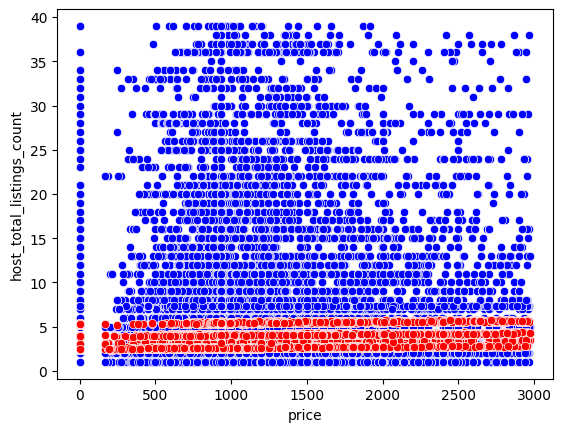

In [56]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='price', y='host_total_listings_count', color="blue", data=df)
sns.scatterplot(x='price', y='PrediccionesMultiples4', color="red", data=df)


In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.46799633741765456

In [58]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.6841025781398975)

Regresión multiple bedrooms

<Axes: xlabel='accommodates', ylabel='bedrooms'>

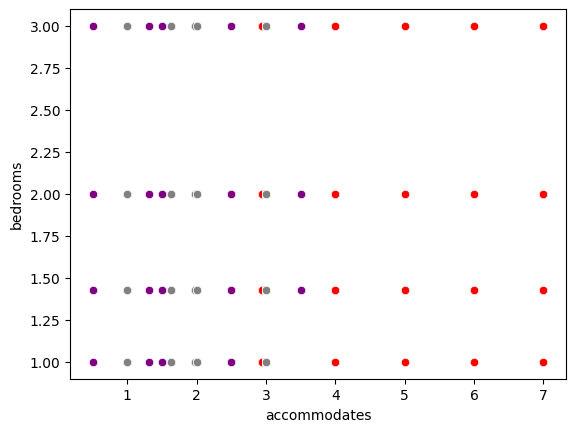

In [59]:
from turtle import color
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=df)
sns.scatterplot(x='bathrooms', y='bedrooms', color="purple", data=df)
sns.scatterplot(x='beds', y='bedrooms', color="grey", data=df)

In [60]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['accommodates', 'bathrooms','beds']]
Var_Dep= df['bedrooms']

In [61]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [62]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bathrooms', 'beds'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.21306436, 0.33074925, 0.17002203]),
 'rank_': 3,
 'singular_': array([194.19744257,  69.50654473,  64.81766968]),
 'intercept_': np.float64(0.11147177422042942)}

In [63]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.5608945190868901

In [64]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['accommodates', 'bathrooms','beds']])
y_pred

array([1.03837179, 1.40357366, 1.63452254, ..., 1.03837179, 1.42145818,
       1.03837179], shape=(17363,))

In [65]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples5', y_pred)
df

,PrediccionesMultiples5,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,instant_bookable,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,1.038372,2.581702,6.860009,0.468968,0.741974,0,0.00,0,1,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,1.403574,2.997988,6.520933,0.376891,0.811265,1,0.93,1,1,0,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,1.634523,4.041834,8.395141,0.574643,0.965831,2,0.57,1,1,0,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,1.038372,2.553309,7.717647,0.489412,0.918027,3,1.00,1,1,0,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,1.203746,2.485997,7.305826,0.468968,0.871690,4,1.00,1,1,0,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,1.804545,5.376969,6.641601,0.417257,0.723767,26572,0.00,0,1,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,1.965272,4.110216,7.767899,0.561921,0.817655,26573,0.00,0,1,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,1.038372,2.613986,7.110892,0.495329,0.762887,26574,0.00,0,1,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,1.421458,2.633068,8.196841,0.522850,0.973148,26575,1.00,1,1,1,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


<Axes: xlabel='accommodates', ylabel='bedrooms'>

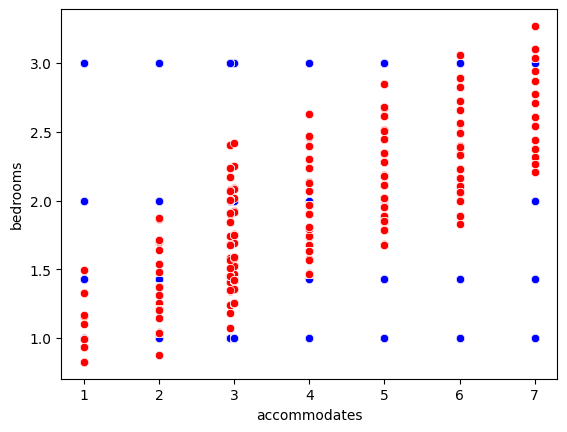

In [66]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=df)
sns.scatterplot(x='accommodates', y='PrediccionesMultiples5', color="red", data=df)


Regresión multiple Price

<Axes: xlabel='availability_90', ylabel='price'>

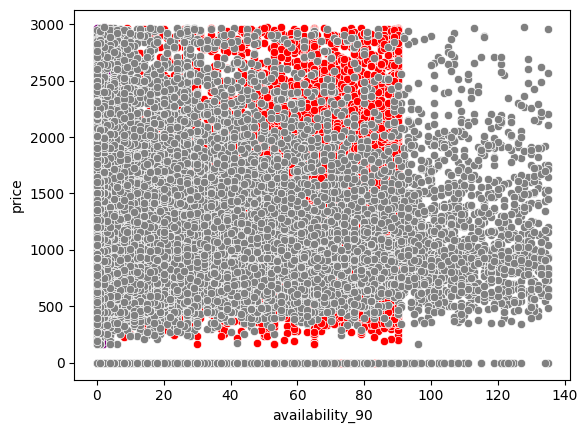

In [67]:
from turtle import color
sns.scatterplot(x='availability_90', y='price', color="red", data=df)
sns.scatterplot(x='reviews_per_month', y='price', color="purple", data=df)
sns.scatterplot(x='number_of_reviews', y='price', color="grey", data=df)

In [68]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['availability_90', 'reviews_per_month','number_of_reviews']]
Var_Dep= df['price']

In [69]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [70]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_90', 'reviews_per_month', 'number_of_reviews'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.20189075, 33.09732168,  0.13328109]),
 'rank_': 3,
 'singular_': array([4290.10056969, 2656.23757558,  136.14155404]),
 'intercept_': np.float64(1088.28593842691)}

In [71]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0038169850699563135

In [73]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['availability_90', 'reviews_per_month','number_of_reviews']])
y_pred

array([1128.10889255, 1099.48372964, 1094.98234415, ..., 1128.3107833 ,
       1134.16561492, 1130.12780001], shape=(17363,))

In [74]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples6', y_pred)
df

,PrediccionesMultiples6,PrediccionesMultiples5,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,1128.108893,1.038372,2.581702,6.860009,0.468968,0.741974,0,0.00,0,1,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,1099.483730,1.403574,2.997988,6.520933,0.376891,0.811265,1,0.93,1,1,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,1094.982344,1.634523,4.041834,8.395141,0.574643,0.965831,2,0.57,1,1,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,1121.175641,1.038372,2.553309,7.717647,0.489412,0.918027,3,1.00,1,1,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,1089.354921,1.203746,2.485997,7.305826,0.468968,0.871690,4,1.00,1,1,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,1130.329691,1.804545,5.376969,6.641601,0.417257,0.723767,26572,0.00,0,1,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,1130.127800,1.965272,4.110216,7.767899,0.561921,0.817655,26573,0.00,0,1,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,1128.310783,1.038372,2.613986,7.110892,0.495329,0.762887,26574,0.00,0,1,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,1134.165615,1.421458,2.633068,8.196841,0.522850,0.973148,26575,1.00,1,1,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


<Axes: xlabel='availability_90', ylabel='price'>

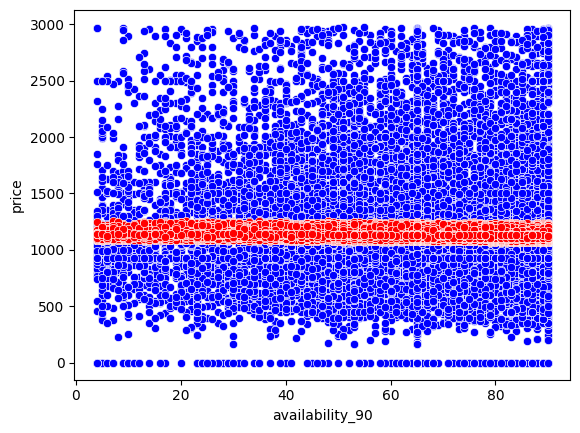

In [75]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='availability_90', y='price', color="blue", data=df)
sns.scatterplot(x='availability_90', y='PrediccionesMultiples6', color="red", data=df)

In [76]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0038169850699563135

In [77]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.061781753535783634)

Regresión multiple reviews_per_month

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

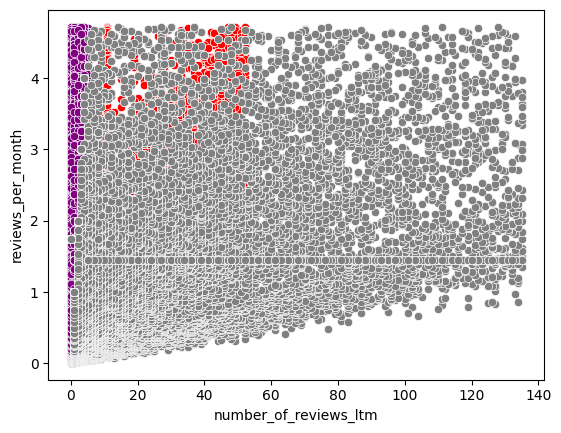

In [79]:
from turtle import color
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="red", data=df)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="purple", data=df)
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="grey", data=df)

In [80]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']]
Var_Dep= df['reviews_per_month']

In [81]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [82]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_l30d',
        'number_of_reviews'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 4.56359040e-02,  1.88817331e-01, -1.70795417e-04]),
 'rank_': 3,
 'singular_': array([4385.28227779, 1484.08538233,  150.72943691]),
 'intercept_': np.float64(0.8085250673352002)}

In [83]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.4968392560522146

In [84]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['number_of_reviews_ltm', 'number_of_reviews_l30d','number_of_reviews']])
y_pred

array([0.80852507, 0.79759416, 0.98269971, ..., 0.80852507, 0.80852507,
       0.80852507], shape=(17363,))

In [85]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'PrediccionesMultiples7', y_pred)
df

,PrediccionesMultiples7,PrediccionesMultiples6,PrediccionesMultiples5,PrediccionesMultiples4,PrediccionesMultiples3New,PrediccionesMultiples2,PrediccionesMultiples1,Unnamed: 0,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,0.808525,1128.108893,1.038372,2.581702,6.860009,0.468968,0.741974,0,0.00,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
1,0.797594,1099.483730,1.403574,2.997988,6.520933,0.376891,0.811265,1,0.93,1,...,4.70,4.87,4.78,4.98,8.0,4.0,1.0,0.0,0.41,1
2,0.982700,1094.982344,1.634523,4.041834,8.395141,0.574643,0.965831,2,0.57,1,...,4.75,4.94,4.92,4.98,2.0,2.0,0.0,0.0,0.31,1
3,1.483920,1121.175641,1.038372,2.553309,7.717647,0.489412,0.918027,3,1.00,1,...,4.96,4.96,4.98,4.96,3.0,2.0,1.0,0.0,0.83,1
4,0.806646,1089.354921,1.203746,2.485997,7.305826,0.468968,0.871690,4,1.00,1,...,5.00,5.00,4.92,4.91,3.0,3.0,0.0,0.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17358,0.808525,1130.329691,1.804545,5.376969,6.641601,0.417257,0.723767,26572,0.00,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17359,0.808525,1130.127800,1.965272,4.110216,7.767899,0.561921,0.817655,26573,0.00,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17360,0.808525,1128.310783,1.038372,2.613986,7.110892,0.495329,0.762887,26574,0.00,0,...,4.76,4.84,4.83,4.85,1.0,1.0,0.0,0.0,1.74,1
17361,0.808525,1134.165615,1.421458,2.633068,8.196841,0.522850,0.973148,26575,1.00,1,...,4.76,4.84,4.83,4.85,6.0,6.0,0.0,0.0,1.74,1


<Axes: xlabel='number_of_reviews_l30d', ylabel='reviews_per_month'>

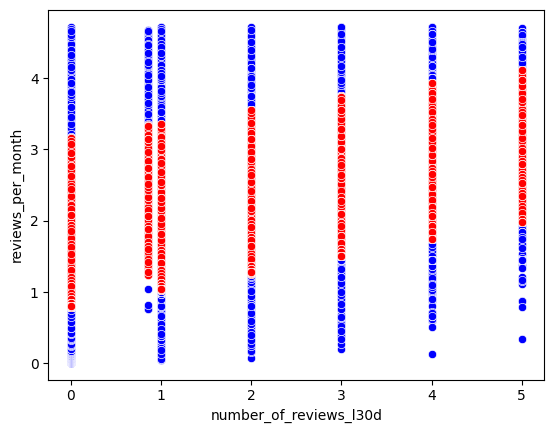

In [86]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="blue", data=df)
sns.scatterplot(x='number_of_reviews_l30d', y='PrediccionesMultiples7', color="red", data=df)
